In [520]:
import numpy as np 
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt 

from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

%matplotlib inline

drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [521]:
## Meu caminho google drive
X_train = pd.read_csv('/gdrive/My Drive/Colab Notebooks/train.csv', sep = ',')
X_test = pd.read_csv('/gdrive/My Drive/Colab Notebooks/test.csv', sep = ',')

## Caminho de localhost
#folder = 'dataset'
#X_train = pd.read_csv(folder+'/train.csv', sep = ',')
#X_test = pd.read_csv(folder+'/test.csv', sep = ',')


In [522]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Cópias do dataset para manipulações diferentes.**

# 1) Correlação 
* Escolhendo os 10 atributos com maior correlação com o SalePrice

In [523]:
corr = X_train.corr()
corr['SalePrice'].sort_values(ascending = False)[:11]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [524]:
X_train = X_train[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath',
                    'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd','Neighborhood', 'SalePrice']]
X_test = X_test[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath',
                    'TotRmsAbvGrd', 'YearBuilt', 'Neighborhood', 'YearRemodAdd']]

# 2) Exploração inicial

In [525]:
X_train.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,Neighborhood,SalePrice
0,7,1710,2,548,856,856,2,8,2003,2003,CollgCr,208500
1,6,1262,2,460,1262,1262,2,6,1976,1976,Veenker,181500
2,7,1786,2,608,920,920,2,6,2001,2002,CollgCr,223500
3,7,1717,3,642,756,961,1,7,1915,1970,Crawfor,140000
4,8,2198,3,836,1145,1145,2,9,2000,2000,NoRidge,250000


In [526]:
X_train.dtypes

OverallQual      int64
GrLivArea        int64
GarageCars       int64
GarageArea       int64
TotalBsmtSF      int64
1stFlrSF         int64
FullBath         int64
TotRmsAbvGrd     int64
YearBuilt        int64
YearRemodAdd     int64
Neighborhood    object
SalePrice        int64
dtype: object

### 2.1) Medidas de centralidade e dispersão

In [527]:
#X_train.describe()
X_train.columns

for i in X_train.columns:
  if(i != 'Neighborhood'): # Coluna categorica
    print("Coluna: ", i)
    print("Média: ", X_train[i].mean())
    print("Mediana: ", X_train[i].median())
    print("Desvio padrão: ", X_train[i].std())
    print("Diferença Média e mediana: ", abs(X_train[i].mean() - X_train[i].median()))
    print('\n\n')

Coluna:  OverallQual
Média:  6.0993150684931505
Mediana:  6.0
Desvio padrão:  1.3829965467415923
Diferença Média e mediana:  0.09931506849315053



Coluna:  GrLivArea
Média:  1515.463698630137
Mediana:  1464.0
Desvio padrão:  525.4803834232027
Diferença Média e mediana:  51.46369863013706



Coluna:  GarageCars
Média:  1.7671232876712328
Mediana:  2.0
Desvio padrão:  0.7473150101111116
Diferença Média e mediana:  0.23287671232876717



Coluna:  GarageArea
Média:  472.9801369863014
Mediana:  480.0
Desvio padrão:  213.80484145338076
Diferença Média e mediana:  7.019863013698625



Coluna:  TotalBsmtSF
Média:  1057.4294520547944
Mediana:  991.5
Desvio padrão:  438.7053244594705
Diferença Média e mediana:  65.92945205479441



Coluna:  1stFlrSF
Média:  1162.626712328767
Mediana:  1087.0
Desvio padrão:  386.5877380410738
Diferença Média e mediana:  75.6267123287671



Coluna:  FullBath
Média:  1.5650684931506849
Mediana:  2.0
Desvio padrão:  0.5509158012954318
Diferença Média e mediana:  0.

### 2.2) Boxplots

No handles with labels found to put in legend.


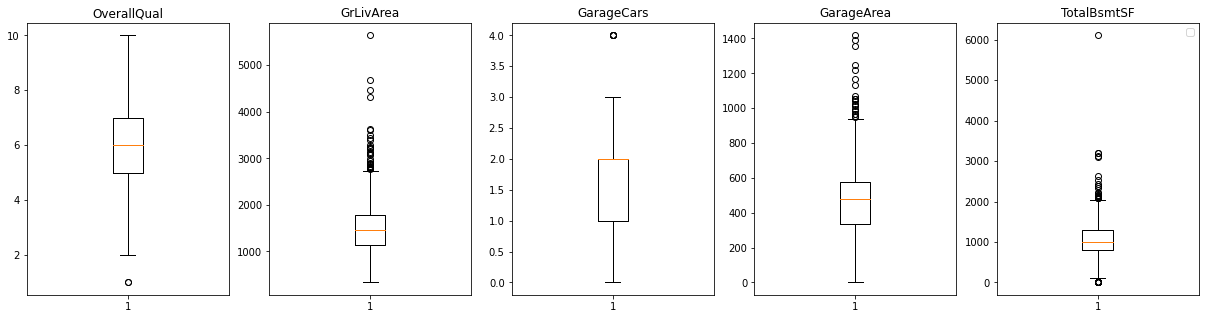

In [528]:
plt.figure(figsize = (21, 5))

plt.subplot(1, 5, 1)
plt.boxplot(X_train['OverallQual'])
plt.title("OverallQual")

plt.subplot(1, 5, 2) # Criando subplot 2
plt.boxplot(X_train['GrLivArea'])
plt.title("GrLivArea")

plt.subplot(1, 5, 3) 
plt.boxplot(X_train['GarageCars'])
plt.title("GarageCars")

plt.subplot(1, 5, 4) 
plt.boxplot(X_train['GarageArea'])
plt.title("GarageArea")

plt.subplot(1, 5, 5) 
plt.boxplot(X_train['TotalBsmtSF'])
plt.title("TotalBsmtSF")

plt.legend()

Text(0.5, 1.0, 'YearRemodAdd')

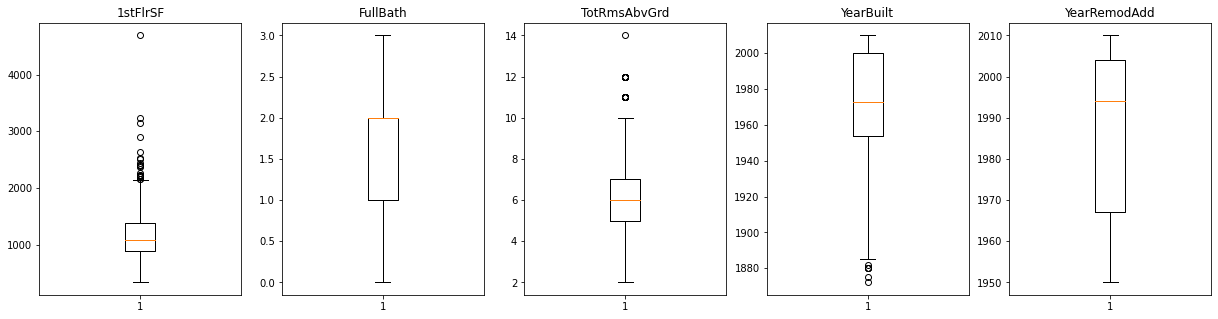

In [529]:
plt.figure(figsize = (21, 5))

plt.subplot(1, 5, 1)
plt.boxplot(X_train['1stFlrSF'])
plt.title("1stFlrSF")

plt.subplot(1, 5, 2) # Criando subplot 2
plt.boxplot(X_train['FullBath'])
plt.title("FullBath")

plt.subplot(1, 5, 3) 
plt.boxplot(X_train['TotRmsAbvGrd'])
plt.title("TotRmsAbvGrd")

plt.subplot(1, 5, 4) 
plt.boxplot(X_train['YearBuilt'])
plt.title("YearBuilt")

plt.subplot(1, 5, 5) 
plt.boxplot(X_train['YearRemodAdd'])
plt.title("YearRemodAdd")


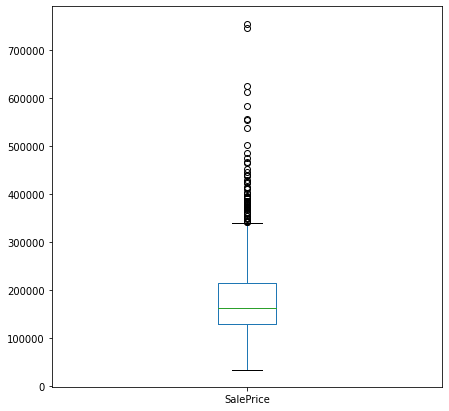

In [530]:
plt.figure(figsize = (7, 7))

X_train['SalePrice'].plot.box()

# 3) Visualização de dados

### 3.1) Dispersão

Text(0.5, 1.0, '1stFlrSF x SalePrice')

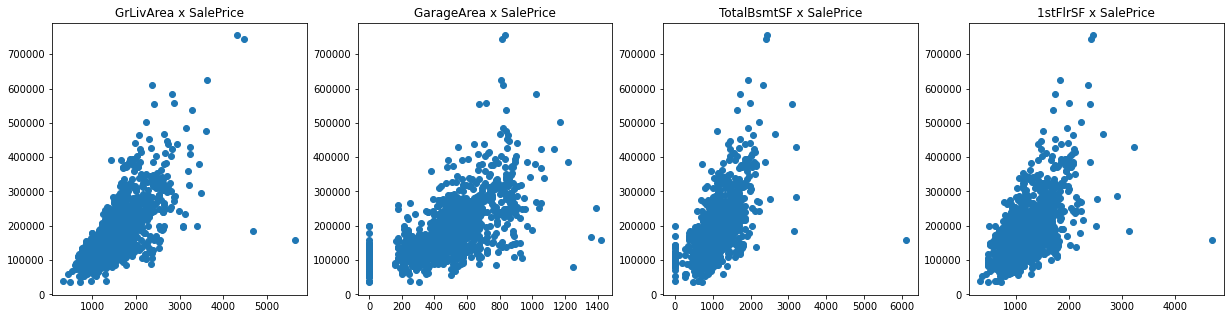

In [531]:
plt.figure(figsize = (21, 5))

plt.subplot(1, 4, 1)
plt.scatter(X_train['GrLivArea'], X_train['SalePrice'], marker='o');
#plt.xlabel('GrLivArea')
#plt.ylabel('SalePrice')
plt.title('GrLivArea x SalePrice')

plt.subplot(1, 4, 2)
plt.scatter(X_train['GarageArea'], X_train['SalePrice'], marker='o');
#plt.xlabel('GarageArea')
#plt.ylabel('SalePrice')
plt.title('GarageArea x SalePrice')

plt.subplot(1, 4, 3)
plt.scatter(X_train['TotalBsmtSF'], X_train['SalePrice'], marker='o');
#plt.xlabel('TotalBsmtSF')
#plt.ylabel('SalePrice')
plt.title('TotalBsmtSF x SalePrice')

plt.subplot(1, 4, 4)
plt.scatter(X_train['1stFlrSF'], X_train['SalePrice'], marker='o');
#plt.xlabel('1stFlrSF')
#plt.ylabel('SalePrice')
plt.title('1stFlrSF x SalePrice')


### 3.2) Histograma

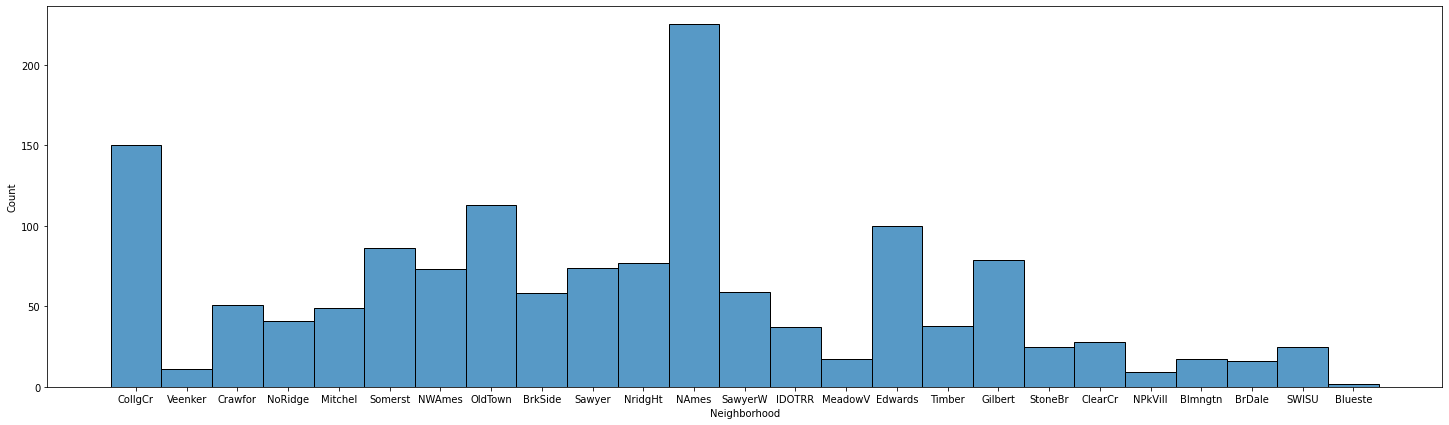

In [532]:
plt.figure(figsize = (25, 7))

sns.histplot(X_train['Neighborhood'])

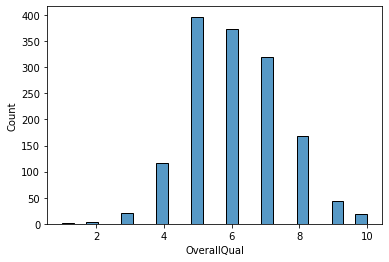

In [533]:
sns.histplot(X_train['OverallQual'])

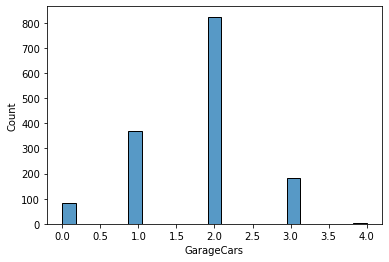

In [534]:
sns.histplot(X_train['GarageCars'])

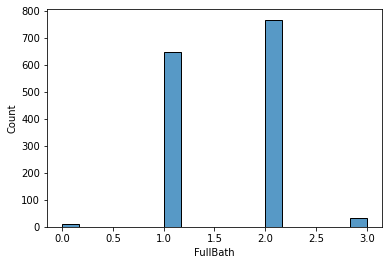

In [535]:
sns.histplot(X_train['FullBath'])

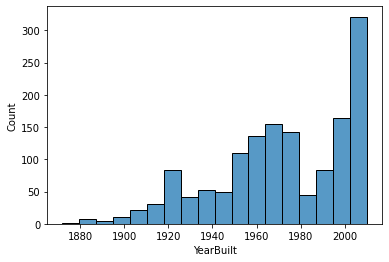

In [536]:
sns.histplot(X_train['YearBuilt'])

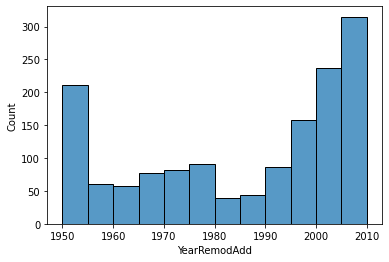

In [537]:
sns.histplot(X_train['YearRemodAdd'])

# 4) Limpeza e Transformação

### 4.1) Limpeza dos dados

**Verificando se há linhas com valores nulos e quais colunas contém mais valores nulos**

In [538]:
print(f"size train:{len(X_train)}, size test:{len(X_test)}")

size train:1460, size test:1459


<BarContainer object of 12 artists>

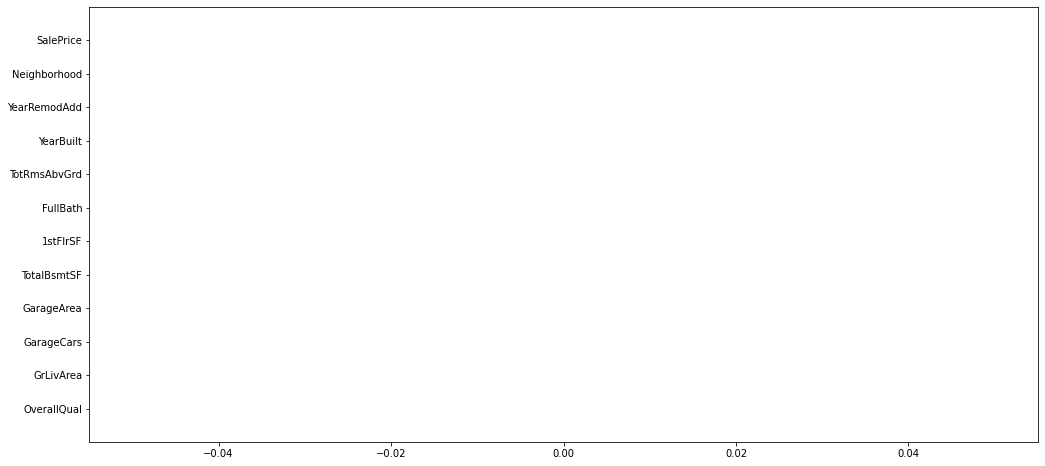

In [539]:
plt.figure(figsize = (17,8))
plt.barh(X_train.columns,X_train.isnull().sum())

<BarContainer object of 11 artists>

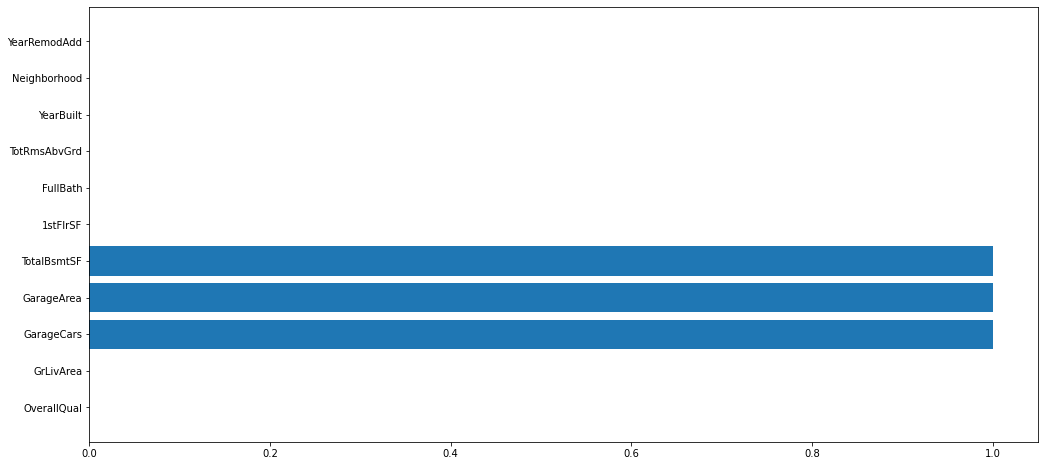

In [540]:
plt.figure(figsize = (17, 8))
plt.barh(X_test.columns, X_test.isnull().sum())

**Colunas com mais valores faltantes no TRAIN**
* Como podemos ver abaixo, não  há colunas com valores faltantes no X_train

In [541]:
X_train.isnull().sum().sort_values(ascending=False)

SalePrice       0
Neighborhood    0
YearRemodAdd    0
YearBuilt       0
TotRmsAbvGrd    0
FullBath        0
1stFlrSF        0
TotalBsmtSF     0
GarageArea      0
GarageCars      0
GrLivArea       0
OverallQual     0
dtype: int64

**Colunas com mais valores faltantes no TEST**

Remover linhas com atributos nulos.


In [542]:
X_test.isnull().sum().sort_values(ascending=False)

TotalBsmtSF     1
GarageArea      1
GarageCars      1
YearRemodAdd    0
Neighborhood    0
YearBuilt       0
TotRmsAbvGrd    0
FullBath        0
1stFlrSF        0
GrLivArea       0
OverallQual     0
dtype: int64

Removendo linhas com dados faltantes

In [543]:
att = ['TotalBsmtSF','GarageArea','GarageCars']

In [544]:
for i in att:
    X_test.drop(X_test[X_test[i].isnull()].index,inplace = True)

In [545]:
print(f"size train:{len(X_train)}, size test:{len(X_test)}")

size train:1460, size test:1457


### 4.2) Transformação dos dados

**Tranformando a variável categórica Neighborhood para valores entre 0 e n_classes-1**

In [546]:
le = preprocessing.LabelEncoder()

In [547]:
X_train.Neighborhood = le.fit_transform(X_train.Neighborhood)
X_test.Neighborhood = le.fit_transform(X_test.Neighborhood)

In [548]:
X_train

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,Neighborhood,SalePrice
0,7,1710,2,548,856,856,2,8,2003,2003,5,208500
1,6,1262,2,460,1262,1262,2,6,1976,1976,24,181500
2,7,1786,2,608,920,920,2,6,2001,2002,5,223500
3,7,1717,3,642,756,961,1,7,1915,1970,6,140000
4,8,2198,3,836,1145,1145,2,9,2000,2000,15,250000
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,2,7,1999,2000,8,175000
1456,6,2073,2,500,1542,2073,2,7,1978,1988,14,210000
1457,7,2340,1,252,1152,1188,2,9,1941,2006,6,266500
1458,5,1078,1,240,1078,1078,1,5,1950,1996,12,142125


## 5) Agrupamentos

Testes de agrupamentos utilizando K-means com variações de K.


In [549]:
from sklearn.cluster import KMeans
from sklearn import decomposition

In [550]:
att = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath',
                    'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
df_group = X_train[att]

In [551]:
df_group

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,7,1710,2,548,856,856,2,8,2003,2003
1,6,1262,2,460,1262,1262,2,6,1976,1976
2,7,1786,2,608,920,920,2,6,2001,2002
3,7,1717,3,642,756,961,1,7,1915,1970
4,8,2198,3,836,1145,1145,2,9,2000,2000
...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,2,7,1999,2000
1456,6,2073,2,500,1542,2073,2,7,1978,1988
1457,7,2340,1,252,1152,1188,2,9,1941,2006
1458,5,1078,1,240,1078,1078,1,5,1950,1996


In [552]:
kmeans = KMeans(n_clusters = 2, random_state=10)

In [553]:
kmeans.fit(df_group)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [554]:
kmeans.labels_ # Saindo diferente

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

#### #Aplicando decomposição PCA para visialização dos dados no gráfico 2d

In [555]:
pca = decomposition.PCA(n_components=1)
pca.fit(df_group)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [556]:
X = pca.transform(df_group)

In [557]:
X = pd.DataFrame(X)

In [558]:
X['Saleprice'] = X_train['SalePrice']

In [559]:
X.columns = ['A','SalePrice']

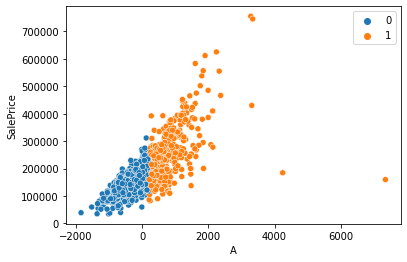

In [560]:
sns.scatterplot(data = X, x='A',y='SalePrice',hue=kmeans.labels_)

In [561]:
df_group['cluster'] = kmeans.labels_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


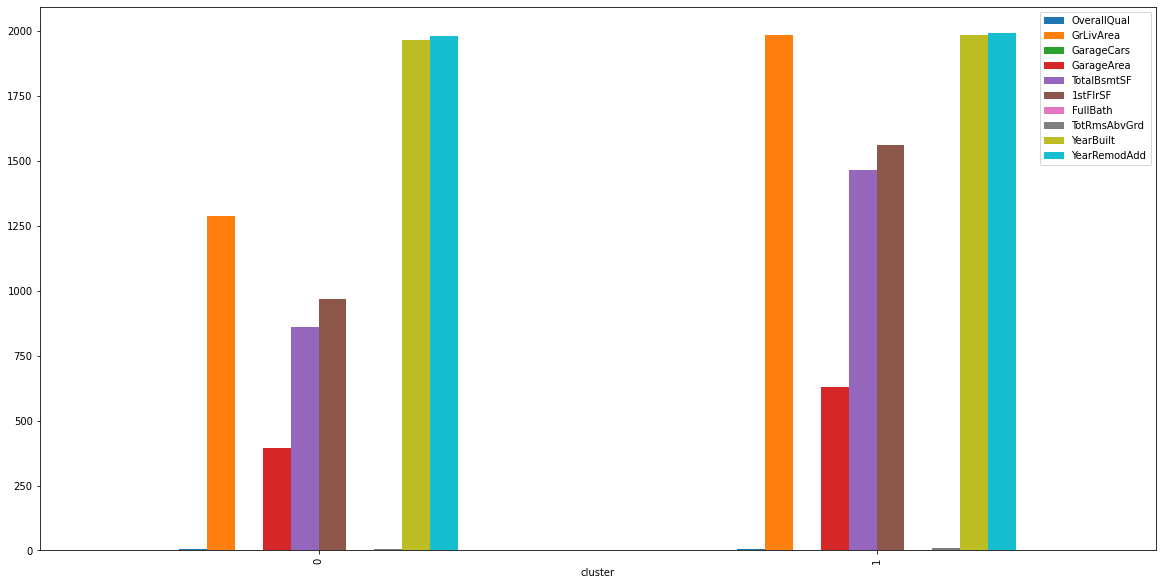

In [562]:
df_group.groupby('cluster').mean().plot.bar(figsize = (20,10))


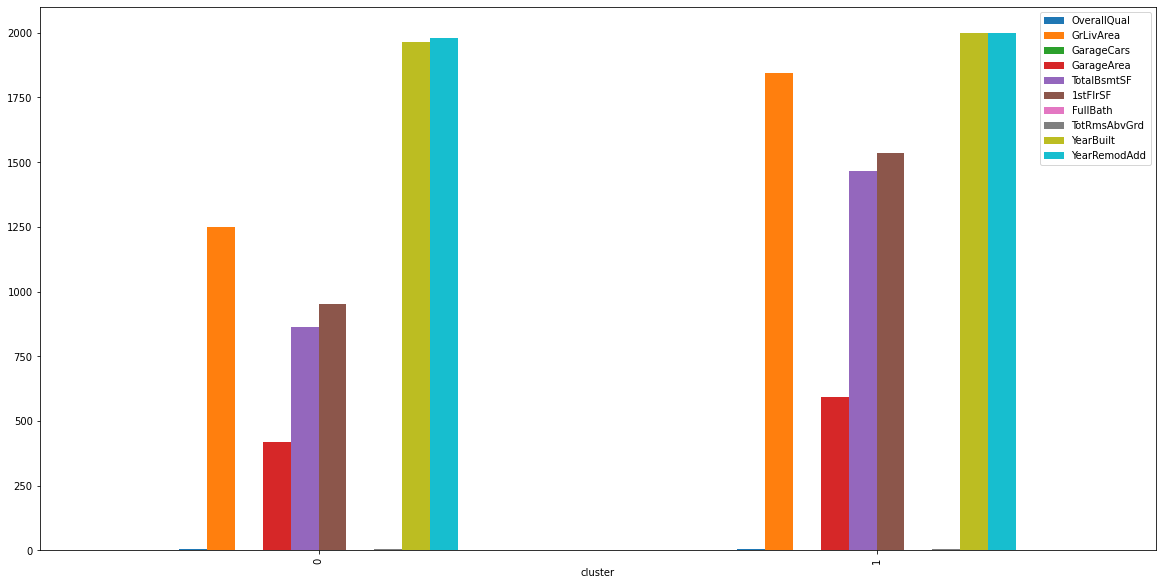

In [563]:
df_group.groupby('cluster').median().plot.bar(figsize = (20,10))


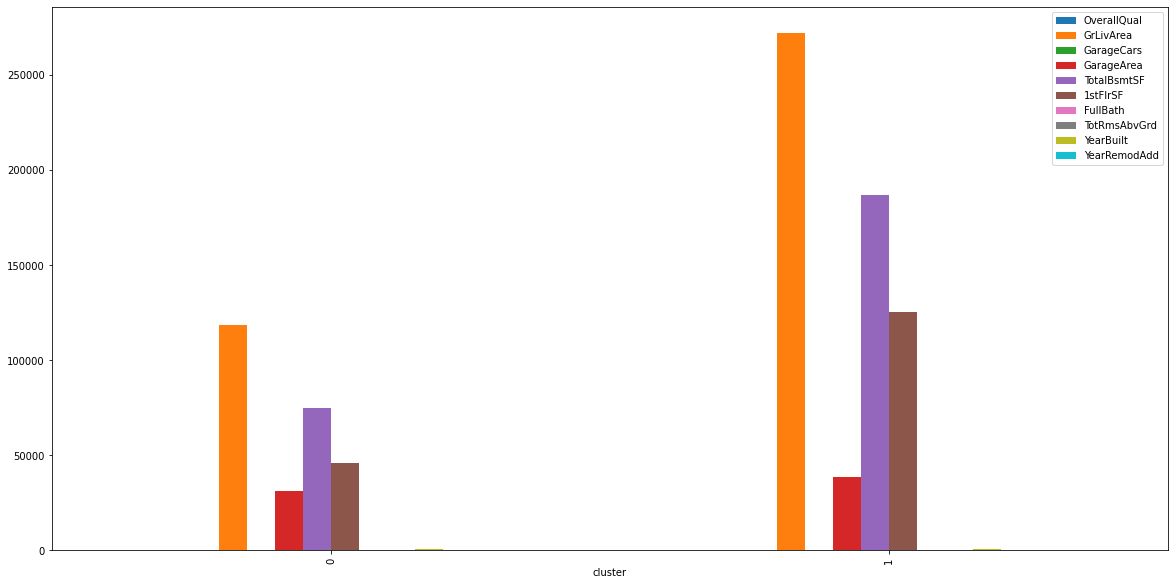

In [564]:
df_group.groupby('cluster').var().plot.bar(figsize = (20,10))


# Respodendo as perguntas
* 1) O quanto o tamanho da garagem de carros influencia no preço de uma casa?
* 2) O quanto a área do porão influencia no preço da casa?
* 3) Quais os bairros que possuem as casas mais caras?
* 4) É possível predizer o preço das casas com base nos atributos do dataset?

## 1) O quanto o tamanho da garagem de carros influencia no preço de uma casa? 

In [565]:
corr = X_train.corr()
corrSP = corr['SalePrice'].sort_values(ascending = False)

In [566]:
print("Correlaçao da área da garagem com o preço da casa: ", str(corrSP['GarageArea']))

Correlaçao da área da garagem com o preço da casa:  0.6234314389183598


**Resposta:** De acordo com a imagem abaixo, a variável GarageArea possui uma correlação forte com a variável SalePrice. Ou seja, a área da garagem influencia fortemente no preço da casa.

* Pelo grafico de dispersão feito anteriormente (GarageArea x SalePrice), é possivel observar que existe uma tendencia de que o preço da casa com garagem grande seja mais cara do que as casas que possuem garagem menor.

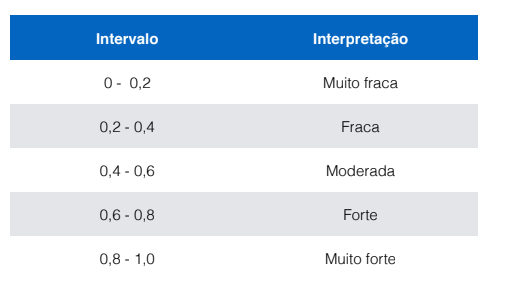

## 2) O quanto a área do porão influencia no preço da casa?

In [567]:
print("Correlaçao da área do porão com o preço da casa: ", str(corrSP['TotalBsmtSF']))

Correlaçao da área do porão com o preço da casa:  0.6135805515591944


**Resposta**: De acordo com a imagem abaixo, a variável TotalBsmtSF possui uma correlação forte com a variável SalePrice. Ou seja, a a área do porão influencia fortemente no preço da casa.
* Pelo grafico de dispersão feito anteriormente (TotalBsmtSF x SalePrice), é possivel observar que existe uma forte tendência do preço da casa ser maior quando esta possui um porão maior.

## 3) Quais os bairros que possuem as casas mais caras?

In [568]:
group = df_train.groupby('Neighborhood').mean().sort_values('SalePrice', ascending = False).head()
print("Bairros,    preços\n")
group['SalePrice']

Bairros,    preços



Neighborhood
NoRidge    335295.317073
NridgHt    316270.623377
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Name: SalePrice, dtype: float64

## 4) É possível predizer o preço das casas com base nos atributos do dataset?
* **obs:** Como não há o atributo salePrice no X_test, será utilizado apenas o X_Train como treino e teste

In [571]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

y = scaler.fit_transform(X_train['SalePrice'].values.reshape(-1, 1))
X = scaler.fit_transform(X_train)

In [572]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

### 4.1) Tentando com Regressão linear

In [573]:
reg = LinearRegression().fit(X_train, y_train)

In [574]:
y_pred = reg.predict(X_test)
print("Erro médio absoluto: ", str(mean_absolute_error(y_test, y_pred)))
print("Erro médio quadrático: ", str(mean_squared_error(y_test, y_pred)))

Erro médio absoluto:  2.8423424351100577e-16
Erro médio quadrático:  1.4417327319167375e-31


### 4.2) Tentando com RandomForestRegressor

In [575]:
regr = RandomForestRegressor(max_depth=10, random_state= 42)

In [576]:
regr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [577]:
y_pred = regr.predict(X_test)
print("Erro médio absoluto: ", str(mean_absolute_error(y_test, y_pred)))
print("Erro médio quadrático: ", str(mean_squared_error(y_test, y_pred)))

Erro médio absoluto:  0.001149728234775672
Erro médio quadrático:  5.1553394325954626e-05
